# matplotlib

## matplotlib 显示中文问题
https://blog.csdn.net/gmr2453929471/article/details/78655834

https://www.zhihu.com/question/25404709

### 不需要下载添加任何字体 (windows)

首先打印出你的font_manager的ttflist中所有注册的名字，你会得到246个注册名字，有常见的Times New Roman，也有不太常见的。

我大致看了一下，有一些看着就很像中文字体啊，比如这个STFangsong 仿宋啊有木有！ Weibei SC 这个看着像北魏啥的

然后直接在python文件中加一条语句就ok了：

`plt.rcParams['font.family']=['STFangsong']用来正常显示中文标签`

`plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号`


In [4]:
import matplotlib

a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)

??????
Adobe Arabic
Adobe Arabic
Adobe Arabic
Adobe Arabic
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Devanagari
Adobe Devanagari
Adobe Devanagari
Adobe Devanagari
Adobe Fan Heiti Std
Adobe Fangsong Std
Adobe Garamond Pro
Adobe Garamond Pro
Adobe Garamond Pro
Adobe Garamond Pro
Adobe Gothic Std
Adobe Gurmukhi
Adobe Gurmukhi
Adobe Hebrew
Adobe Hebrew
Adobe Hebrew
Adobe Hebrew
Adobe Heiti Std
Adobe Kaiti Std
Adobe Ming Std
Adobe Myungjo Std
Adobe Naskh
Adobe Song Std
Agency FB
Agency FB
Algerian
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Rounded MT Bold
Arial Unicode MS
Axure Handwriting
Axure Handwriting
Axure Handwriting
Axure Handwriting
BENMO Fengyue Extra
Bahnschrift
Baskerville Old Face
Bauhaus 93
Bell MT
Bell MT
Bell MT
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Birch Std
Blackadder ITC
Blackoak Std
Bodoni Bd BT
Bodoni Bd BT
Bodoni Bk BT
Bodoni Bk BT
Bodoni MT
Bodoni MT
Bo

## Mac OS 显示中文

1、下载中文字体（黑体，看准系统版本）
https://www.fontpalace.com/font-download/SimHei/

2、解压之后在系统当中安装好，我的是Mac，打开字体册就可以安装了，Windows的在网上搜一下吧

3、找到matplotlib字体文件夹，例如：matplotlib/mpl-data/fonts/ttf，将SimHei.ttf拷贝到ttf文件夹下面

4、修改配置文件matplotlibrc 

同样在matplotlib/mpl-data/fonts目录下面，修改下面三项配置

font.family         : sans-serif        

font.sans-serif     : SimHei, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif   

axes.unicode_minus:False，#作用就是解决负号'-'显示为方块的问题

5、最重要的一步来了，上面的几步我很快就弄好了，就这最后一步死活中文就是显示方块，气死我了，原因是改了配置之后并不会生效，需要重新加载字体，在Python中运行如下代码即可：

from matplotlib.font_manager import _rebuild _rebuild() #reload一下


## 中文字体的英文名称

### Mac OS

华文细黑：STHeiti Light [STXihei]

华文黑体：STHeiti

华文楷体：STKaiti

华文宋体：STSong

华文仿宋：STFangsong

俪黑 Pro：LiHei Pro Medium

俪宋 Pro：LiSong Pro Light

标楷体：BiauKai

苹果俪中黑：Apple LiGothic Medium

苹果俪细宋：Apple LiSung Light

### Windows

新细明体：PMingLiU

细明体：MingLiU

标楷体：DFKai-SB

黑体：SimHei

宋体：SimSun

新宋体：NSimSun

仿宋：FangSong

楷体：KaiTi

仿宋_GB2312：FangSong_GB2312

楷体_GB2312：KaiTi_GB2312

微软正黑体：Microsoft JhengHei

微软雅黑体：Microsoft YaHei

### 装Office会生出

隶书：LiSu

幼圆：YouYuan

华文细黑：STXihei

华文楷体：STKaiti

华文宋体：STSong

华文中宋：STZhongsong

华文仿宋：STFangsong

方正舒体：FZShuTi

方正姚体：FZYaoti

华文彩云：STCaiyun

华文琥珀：STHupo

华文隶书：STLiti

华文行楷：STXingkai

华文新魏：STXinwei

## matplotlib颜色问题

https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

![matplotlib颜色](https://i.stack.imgur.com/nCk6u.jpg)

## 饼图

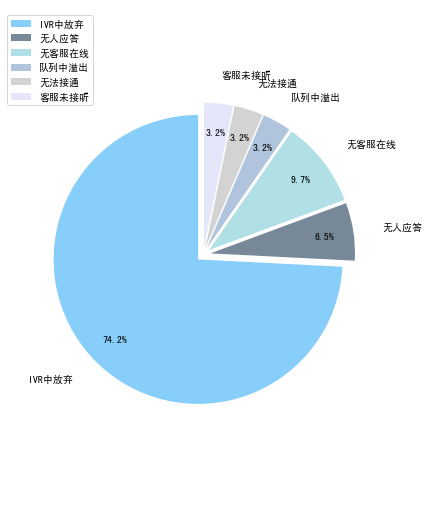

In [1]:
import matplotlib.pyplot as plt

#plt.rcParams['font.sans-serif'] = ['SimHei']# 解决matplotlib中文乱码问题,只在Windows下可以

#调节图形大小，宽，高
plt.figure(figsize=(6,9))

#定义饼状图的标签，标签是列表
labels = ['IVR中放弃','无人应答','无客服在线','队列中溢出','无法接通','客服未接听']

#每个标签占多大，会自动去算百分比
sizes = [23, 2, 3, 1, 1, 1]

#颜色列表
colors = ['lightskyblue','lightslategray','powderblue','lightsteelblue','lightgray','lavender','lavenderblush','lightpink','navajowhite']

explode = (0.05,)*len(labels)
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors[:len(labels)],
                                labeldistance = 1.2,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.8)

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)
    
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
# loc: 表示legend的位置，包括'upper right','upper left','lower right','lower left'等
# bbox_to_anchor: 表示legend距离图形之间的距离，当出现图形与legend重叠时，可使用bbox_to_anchor进行调整legend的位置
# 由两个参数决定，第一个参数为legend距离左边的距离，第二个参数为距离下面的距离

plt.show()